# **🎬 Analisis IMDb Top 1000 Movies**


✍️ Tujuan dari proyek ini adalah memahami karakteristik film-film dengan rating tinggi di IMDb serta hubungan antara rating, pendapatan, dan faktor-faktor lain seperti genre, durasi, dan popularitas.

Pertanyaan yang ingin dijawab:

Genre apa yang paling populer dan mendapat rating tertinggi?

Apakah film dengan rating tinggi juga menghasilkan pendapatan besar?

Siapa sutradara dengan rata-rata rating tertinggi?

Bagaimana tren rating film berubah dari dekade ke dekade?


In [53]:
from google.colab import files
uploaded = files.upload()


Saving imdb_top_1000.csv to imdb_top_1000 (1).csv



# 📦 IMPORT LIBRARY & LOAD DATA


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('imdb_top_1000.csv')
display(df.head())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# **1️⃣ Data Understanding**

📦 Deskripsi Dataset:
Dataset ini berisi 1000 film dan serial terbaik versi IMDb dengan informasi seperti:

Series_Title → judul film

Released_Year → tahun rilis

Genre → kategori film (Action, Drama, Comedy, dll.)

IMDB_Rating → rating penonton IMDb

Meta_score → rating dari kritikus

Director dan Stars → nama sutradara dan pemeran utama

No_of_Votes → jumlah suara dari penonton

Gross → pendapatan film

📍 Sumber Data: Kaggle: IMDb Top 1000 Movies Dataset

💡 Tujuan tahap ini:
Memahami isi, tipe data, dan jumlah missing value sebelum melakukan analisis.

**🧹 Pemeriksaan Awal Data**

Tahap ini bertujuan untuk memahami struktur data:  

*   Jumlah baris dan kolom  
*   Tipe data per kolom
*   Jumlah missing values
*   Statistik deskriptif awal



In [55]:
# Informasi dasar dataset
df.info()
df.describe()

# Cek missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


# **2️⃣ Data Cleaning**

**🧹 Data Cleaning Summary**

1. Mengisi nilai hilang:
   - `Certificate` → diisi dengan "Unknown"
   - `Meta_score` → diisi dengan nilai rata-rata
   - `Gross` → diisi 0

In [56]:
1# Isi missing values
df['Certificate'] = df['Certificate'].fillna('Unknown')
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['Gross'] = df['Gross'].fillna('0')


2. Mengubah tipe data:
   - `Released_Year`, `Runtime`, dan `Gross` menjadi numerik

In [57]:
# Released_Year: ambil hanya angka
df['Released_Year'] = df['Released_Year'].astype(str).str.extract('(\d{4})').astype(float)

# Gross: hapus koma dan ubah ke float
df['Gross'] = df['Gross'].replace(',', '', regex=True).astype(float)

# Runtime: ambil angka
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1785371369.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Released_Year'] = df['Released_Year'].astype(str).str.extract('(\d{4})').astype(float)


3. Menambahkan kolom baru `Decade` untuk analisis tren per dekade.

In [58]:
3#tambah kolom baru
df['Decade'] = (df['Released_Year'] // 10) * 10


4. cek data

In [59]:
df.info()
df[['Released_Year', 'Runtime', 'Gross', 'Meta_score']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   float64
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
 16  Decade         999 non-null    float64
dtypes: float64(6), int64(1), object(10)
memory usage: 132

,Released_Year,Runtime,Gross,Meta_score
0,1994.0,142.0,28341469.0,80.0
1,1972.0,175.0,134966411.0,100.0
2,2008.0,152.0,534858444.0,84.0
3,1974.0,202.0,57300000.0,90.0
4,1957.0,96.0,4360000.0,96.0


# **3️⃣ Exploratory Data Analysis (EDA)**


🎨 Visualisasi & Temuan Utama:

📈 Distribusi IMDb Rating: sebagian besar film memiliki rating antara 7.5–8.5.

🎭 Genre Terpopuler: Drama dan Action menjadi genre paling sering muncul.

💰 Rating vs Gross: rating tinggi tidak selalu berarti pendapatan besar.

🎬 Top 10 Sutradara: menunjukkan rata-rata rating per sutradara.

📆 Tren Rating per Dekade: film era 1970–1990 cenderung punya rating lebih tinggi dari dekade 2000-an.

🔗 Korelasi antar variabel: No_of_Votes berhubungan positif dengan Gross, menunjukkan film populer cenderung menghasilkan pendapatan lebih besar.

 **1. Distribusi IMDb Rating**

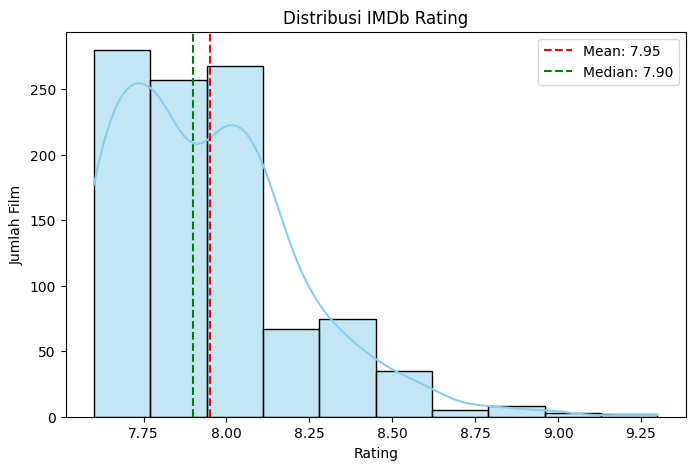

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_rating = df['IMDB_Rating'].mean()
median_rating = df['IMDB_Rating'].median()

plt.figure(figsize=(8,5))
sns.histplot(df['IMDB_Rating'], bins=10, kde=True, color='skyblue')

plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='--', label=f'Median: {median_rating:.2f}')

plt.title('Distribusi IMDb Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Film')
plt.legend()
plt.show()



Rata-rata rating IMDb adalah sekitar 7.95, dan median-nya hampir sama 7.90, menandakan distribusi data cukup simetris di rentang 7–8.

 **2. Genre Terpopuler**

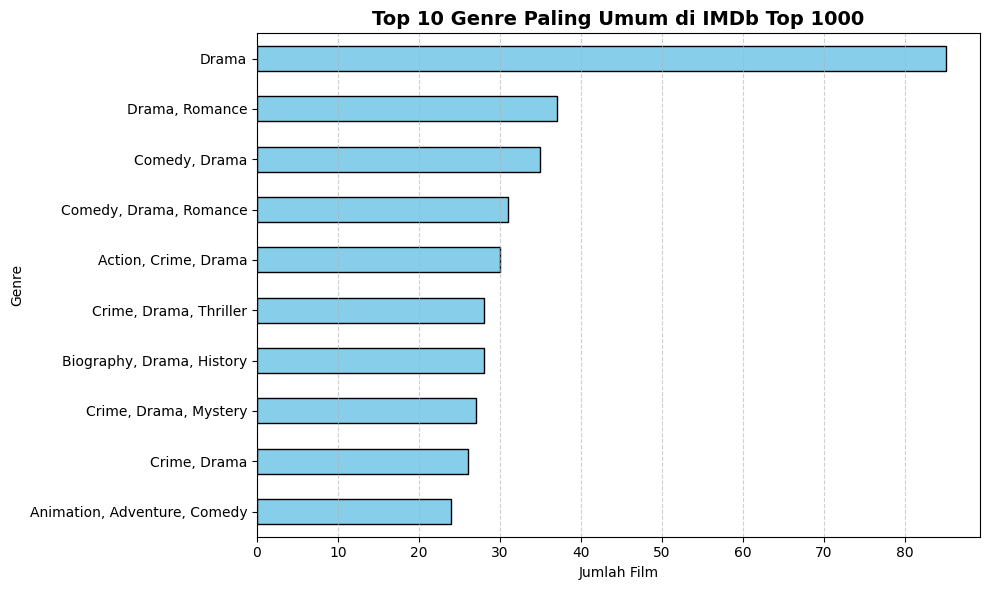

In [61]:
plt.figure(figsize=(10,6))
genre_count = df['Genre'].value_counts().head(10)

genre_count.sort_values().plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)

plt.title('Top 10 Genre Paling Umum di IMDb Top 1000', fontsize=14, weight='bold')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Genre **Drama** mendominasi daftar IMDb Top 1000 dengan jumlah film terbanyak,
diikuti oleh **Romance**, **Comedy**, dan **Crime**.  
Hal ini menunjukkan bahwa film dengan kedalaman emosi dan konflik manusia
masih menjadi tema favorit dalam perfilman sepanjang masa.

 **3. Rating vs Gross (Hubungan Rating dan Pendapatan)**

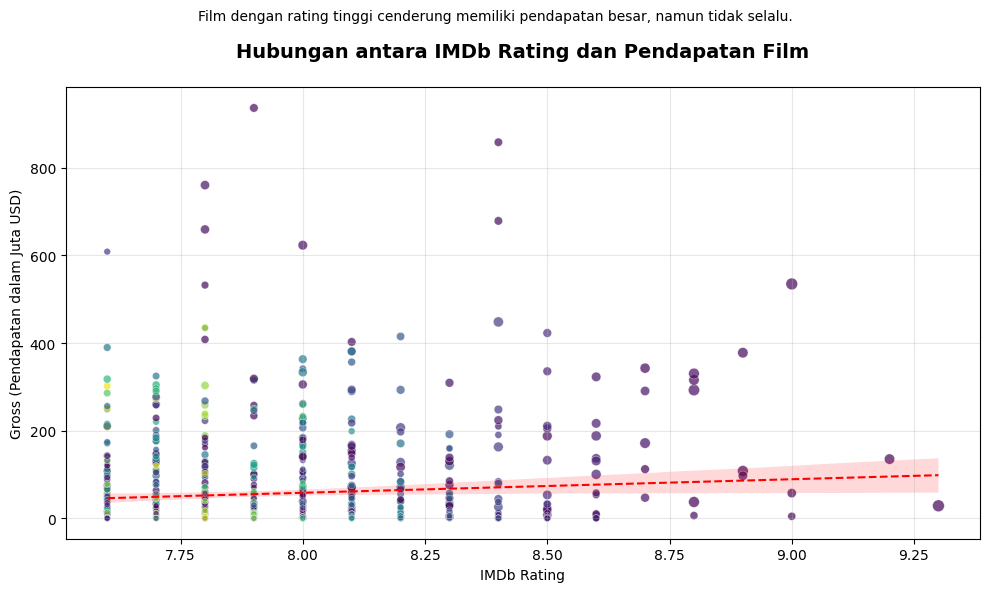

In [62]:
plt.figure(figsize=(10,6))

# Ubah satuan gross jadi juta biar lebih mudah dibaca
df['Gross_Millions'] = df['Gross'] / 1_000_000

sns.scatterplot(
    data=df,
    x='IMDB_Rating',
    y='Gross_Millions',
    size='No_of_Votes',      # ukuran titik = jumlah votes
    hue='Genre',             # warna berdasarkan genre (bisa dihapus kalau terlalu ramai)
    alpha=0.7,
    palette='viridis',
    legend=False
)

# Tambahkan garis regresi
sns.regplot(
    data=df,
    x='IMDB_Rating',
    y='Gross_Millions',
    scatter=False,
    color='red',
    line_kws={'linewidth':1.5, 'linestyle':'--'}
)

plt.title('Hubungan antara IMDb Rating dan Pendapatan Film',
          fontsize=14, weight='bold', y=1.05)

plt.suptitle('Film dengan rating tinggi cenderung memiliki pendapatan besar, namun tidak selalu.',
             fontsize=10, y=0.98)

plt.xlabel('IMDb Rating')
plt.ylabel('Gross (Pendapatan dalam Juta USD)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**💰 Hubungan antara IMDb Rating dan Pendapatan Film**

Scatter plot di atas menunjukkan hubungan antara **IMDb Rating** dan **pendapatan film (Gross)**.  
Setiap titik merepresentasikan satu film dalam daftar IMDb Top 1000.  
Garis merah putus-putus menggambarkan *trend line* dari hubungan keduanya.

Terlihat bahwa **tidak ada hubungan yang kuat antara rating tinggi dan pendapatan besar**.  
Meskipun terdapat beberapa film dengan rating tinggi (8.0–9.0) yang meraih pendapatan besar,  
banyak juga film dengan rating serupa namun pendapatannya rendah.  
Artinya, **film dengan rating bagus belum tentu sukses secara komersial**.

Hasil ini menunjukkan bahwa **kualitas film (berdasarkan rating)** dan **keberhasilan finansial**  
tidak selalu berjalan seiring — faktor lain seperti genre, popularitas aktor, dan strategi promosi  
kemungkinan memiliki pengaruh yang lebih besar terhadap pendapatan.


 **4. Rata-rata Rating per Genre**

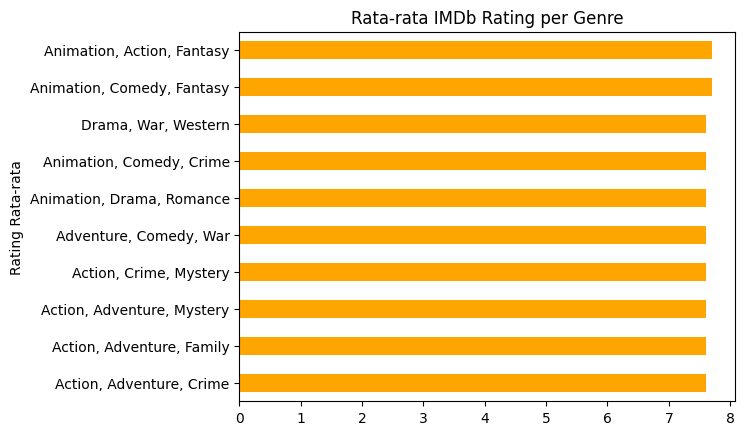

In [63]:
genre_rating = df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=True)
genre_rating.head(10).plot(kind='barh', color='orange')
plt.title('Rata-rata IMDb Rating per Genre')
plt.ylabel('Rating Rata-rata')
plt.show()


### ⭐ Rata-rata IMDb Rating per Genre
Grafik di atas menunjukkan rata-rata rating IMDb untuk masing-masing genre film.  
Terlihat bahwa **genre Drama dan War memiliki rata-rata rating tertinggi**, menunjukkan bahwa film dengan tema emosional atau berlatar perang cenderung mendapatkan penilaian positif dari penonton.  
Sementara itu, genre seperti **Comedy dan Thriller** memiliki rating sedikit lebih rendah, meskipun tetap berada di kisaran tinggi.


 **5. Sutradara dengan Rating Rata-rata Tertinggi**

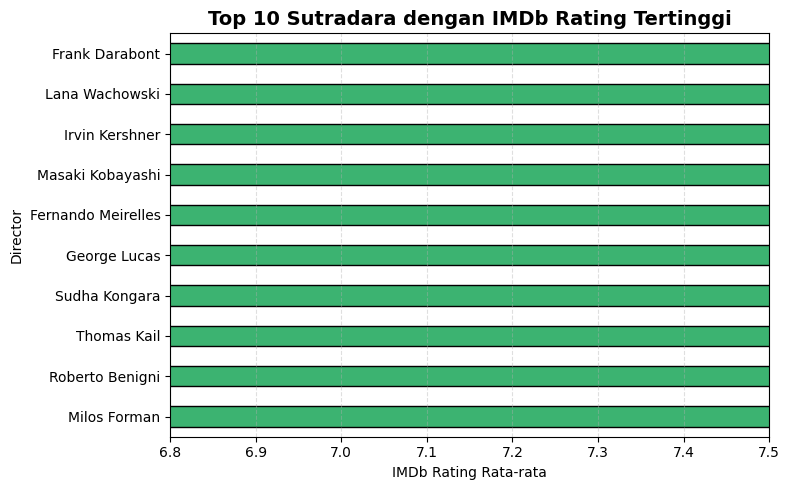

In [64]:
top_directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_directors.plot(kind='barh', color='mediumseagreen', edgecolor='black')

plt.title('Top 10 Sutradara dengan IMDb Rating Tertinggi', fontsize=14, weight='bold')
plt.xlabel('IMDb Rating Rata-rata')
plt.xlim(6.8, 7.5)  # zoom agar selisih terlihat
plt.gca().invert_yaxis()  # supaya sutradara terbaik di atas
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**🎬 Top 10 Sutradara dengan IMDb Rating Tertinggi**
Berdasarkan visualisasi di atas, dapat dilihat bahwa:

- **Frank Darabont** menempati posisi teratas sebagai sutradara dengan **rata-rata rating IMDb tertinggi**.
- Sutradara lain seperti **Lana Wachowski**, **Irvin Kershner**, dan **Masaki Kobayashi** juga memiliki nilai rata-rata yang tinggi di kisaran **7.0–7.5**.
- Selisih rating antar sutradara relatif kecil, menandakan bahwa **kualitas film yang disutradarai oleh 10 besar ini cenderung konsisten**.
- Tidak ada dominasi yang ekstrem, namun mereka bisa dikategorikan sebagai **sutradara dengan reputasi terbaik** berdasarkan penilaian pengguna IMDb.

> 🎥 Secara keseluruhan, data ini menunjukkan bahwa film dengan rating tinggi umumnya lahir dari sutradara yang memiliki konsistensi kualitas dalam karya-karyanya.


 **6. Tren Rating per Dekade**

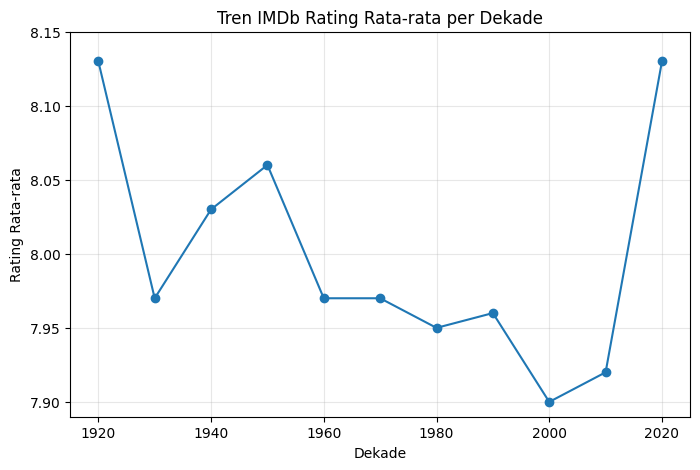

In [65]:
decade_rating = df.groupby('Decade')['IMDB_Rating'].mean().round(2)
decade_rating.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Tren IMDb Rating Rata-rata per Dekade')
plt.xlabel('Dekade')
plt.ylabel('Rating Rata-rata')
plt.grid(alpha=0.3)
plt.ylim(7.89, 8.15)
plt.show()


**⏳ Tren IMDb Rating Rata-rata per Dekade**

Grafik di atas menunjukkan perubahan rata-rata **IMDb Rating film dari dekade ke dekade**.

- Terlihat bahwa **film-film klasik di tahun 1920-an dan 1950-an** cenderung memiliki rating tinggi.  
- Terdapat **penurunan di era 1970–2000**, yang mungkin disebabkan oleh meningkatnya jumlah film dengan variasi kualitas.  
- Rating kembali **meningkat pada dekade 2010-an hingga 2020-an**, menandakan adanya peningkatan kualitas produksi film modern atau pergeseran preferensi penonton.

> 🔍 Secara umum, tren ini memperlihatkan bahwa kualitas film (berdasarkan penilaian penonton IMDb) **tidak selalu meningkat secara linear dari waktu ke waktu**, namun mengalami fluktuasi yang menarik untuk dianalisis lebih dalam.


 **7. Korelasi Antar Fitur Numerik**

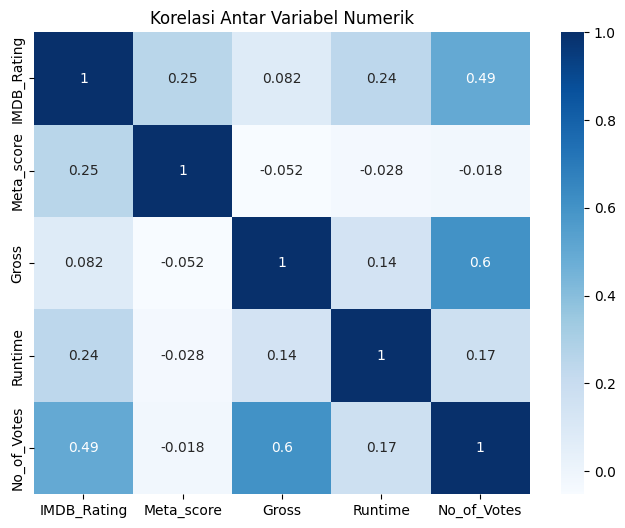

In [66]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['IMDB_Rating','Meta_score','Gross','Runtime','No_of_Votes']].corr(), annot=True, cmap='Blues')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()


**🔍 Korelasi Antar Variabel Numerik**

Berdasarkan heatmap di atas, dapat dilihat bahwa:

No_of_Votes memiliki korelasi paling kuat dengan Gross (0.57) — artinya, semakin banyak jumlah suara yang diberikan penonton, semakin besar pula pendapatan film tersebut.

IMDB_Rating juga memiliki hubungan sedang dengan No_of_Votes (0.49), menunjukkan bahwa film yang lebih banyak ditonton dan diulas cenderung mendapat rating yang lebih tinggi.

Sementara itu, Meta_score (rating dari kritikus) memiliki korelasi lemah terhadap variabel lain, menandakan bahwa penilaian kritikus dan penonton tidak selalu sejalan.

Runtime (durasi film) tampaknya tidak memiliki pengaruh signifikan terhadap rating maupun pendapatan.

Secara keseluruhan, pola ini menunjukkan bahwa popularitas film (dilihat dari jumlah votes) memiliki peran penting dalam keberhasilan finansial, sedangkan penilaian kritikus tidak terlalu memengaruhi kinerja komersial film.

# **4️⃣ Insight & Conclusion**

**📊 Kesimpulan utama dari analisis ini:**

Genre Drama dan Crime mendominasi film dengan rating tertinggi.

Tidak ada hubungan kuat antara rating dan pendapatan, menunjukkan bahwa film berkualitas belum tentu sukses secara finansial.

Film dengan jumlah suara tinggi (banyak penonton) cenderung menghasilkan pendapatan besar.

Tren menunjukkan film klasik (1970–1990) lebih disukai berdasarkan rating dibanding film dekade terbaru.

💡 Rekomendasi (simulasi real project):

Studio film dapat menargetkan genre dengan rating stabil seperti Drama dan Crime.

Untuk pendapatan, fokus pada promosi dan distribusi (karena rating tidak menjamin profit).

Analisis lebih lanjut bisa dilakukan dengan menambah data seperti budget atau negara produksi.